## CMPE 462 HOMEWORK 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Dimensionality Reduction

# A: Creating Datasets
Steps:
* Generate 500 points from $\frac{x^2}{2^2}+ \frac{y^2}{5^2} \le 1$(From ellipse with 2, 5 radius on the x and y axes respectively). Example way:
    - Generate 500 angle values $\{\theta^t\}$ in range $[-\pi,+\pi]$
    - Generate 500 values $\{r^t\}$ in range $[0,1]$
    - Generate 500 points $\{x^t,y^t\}$ where $x^t = 2r^tsin(\theta^t)$ and $y^t = 5r^tcos(\theta^t)$.
* Generate 3 set of labels. Do it by dividing data using following Lines (eg. one side of line is label 0, other side is label 1)
    - $y=0$ line
    - $x=0$ line 
    - $y=3x +1$ line 
* Visualize points with each set of labels in subplots with 1 row, 3 columns where each column corresponds to one set of labels. (Use different colors for each label.)  

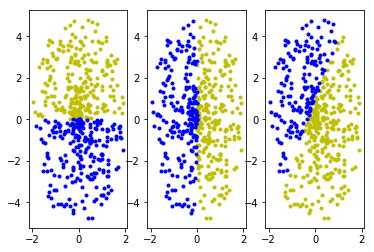

In [2]:
thetas = np.random.uniform(-1*np.pi, np.pi, 500)
rs = np.random.uniform(0, 1, 500)
xs = (list(map(lambda r, theta: 2*r*np.sin(theta), rs, thetas)))
ys = (list(map(lambda r, theta: 5*r*np.cos(theta), rs, thetas)))

firstLabels = {} 
secLabels = {}
thirdLabels  = {}

for i in range(500):
    if ys[i] > 0:
        firstLabels[(xs[i],ys[i])] = 1
    else:
        firstLabels[(xs[i],ys[i])] = 0
    
    if xs[i] > 0:
        secLabels[(xs[i],ys[i])] = 1
    else:
        secLabels[(xs[i],ys[i])] = 0
    
    if 3*xs[i] + 1 > ys[i]:
        thirdLabels[(xs[i],ys[i])] = 1
    else:
        thirdLabels[(xs[i],ys[i])] = 0
        
ax1 = plt.subplot(131)
ax1.plot([x[0] for x in firstLabels if firstLabels[x] == 1 ], [x[1] for x in firstLabels if firstLabels[x] == 1 ], '.y',
        [x[0] for x in firstLabels if firstLabels[x] == 0 ], [x[1] for x in firstLabels if firstLabels[x] == 0 ], '.b')

ax2 = plt.subplot(132)
ax2.plot([x[0] for x in secLabels if secLabels[x] == 1 ], [x[1] for x in secLabels if secLabels[x] == 1 ], '.y',
        [x[0] for x in secLabels if secLabels[x] == 0 ], [x[1] for x in secLabels if secLabels[x] == 0 ], '.b')

ax2 = plt.subplot(133)
ax3 = plt.plot([x[0] for x in thirdLabels if thirdLabels[x] == 1 ], [x[1] for x in thirdLabels if thirdLabels[x] == 1 ], '.y',
        [x[0] for x in thirdLabels if thirdLabels[x] == 0 ], [x[1] for x in thirdLabels if thirdLabels[x] == 0 ], '.b')

plt.show()


# B: Applying PCA
Steps:
* Write PCA function.
* Apply PCA to data you generated.
* Visualize each set of labels using first principle component. 
* Visualize each set of labels using second principle component. 

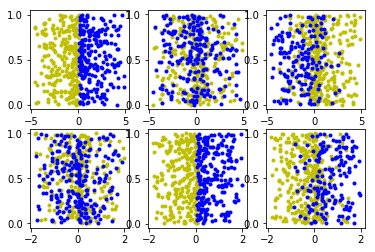

In [3]:
def PCA(data):
    sigma = np.cov(data)
    values, vectors = np.linalg.eig(sigma)
    # sort eigenvalue in decreasing order
    idx = np.argsort(values)[::-1]
    values = values[idx]
    vectors = vectors[:,idx]
    return vectors

us = PCA([xs,ys])
firstPC = us[:,0]
secondPC = us[:,1]
means = np.mean([xs,ys], axis=1)
xNorm = xs - means[0]
yNorm = ys - means[1]

z1s = firstPC.T.dot([xNorm, yNorm])
z2s = secondPC.T.dot([xNorm, yNorm])

ax1 = plt.subplot(231)
ax1.plot([z1s[i] for i in range(len(firstLabels)) if firstLabels[(xs[i],ys[i])] == 1],[np.random.rand() for i in range(len(firstLabels)) if firstLabels[(xs[i],ys[i])] == 1], '.y',
        [z1s[i] for i in range(len(firstLabels)) if firstLabels[(xs[i],ys[i])] == 0] ,  [np.random.rand() for i in range(len(firstLabels)) if firstLabels[(xs[i],ys[i])] == 0], '.b')

ax2 = plt.subplot(232)
ax2.plot([z1s[i] for i in range(len(secLabels)) if secLabels[(xs[i],ys[i])] == 1],[np.random.rand() for i in range(len(secLabels)) if secLabels[(xs[i],ys[i])] == 1], '.y',
        [z1s[i] for i in range(len(secLabels)) if secLabels[(xs[i],ys[i])] == 0] ,  [np.random.rand() for i in range(len(secLabels)) if secLabels[(xs[i],ys[i])] == 0], '.b')

ax3 = plt.subplot(233)
ax3.plot([z1s[i] for i in range(len(thirdLabels)) if thirdLabels[(xs[i],ys[i])] == 1],[np.random.rand() for i in range(len(thirdLabels)) if thirdLabels[(xs[i],ys[i])] == 1], '.y',
        [z1s[i] for i in range(len(thirdLabels)) if thirdLabels[(xs[i],ys[i])] == 0] ,  [np.random.rand() for i in range(len(thirdLabels)) if thirdLabels[(xs[i],ys[i])] == 0], '.b')

ax4 = plt.subplot(234)
ax4.plot([z2s[i] for i in range(len(firstLabels)) if firstLabels[(xs[i],ys[i])] == 1],[np.random.rand() for i in range(len(firstLabels)) if firstLabels[(xs[i],ys[i])] == 1], '.y',
        [z2s[i] for i in range(len(firstLabels)) if firstLabels[(xs[i],ys[i])] == 0] ,  [np.random.rand() for i in range(len(firstLabels)) if firstLabels[(xs[i],ys[i])] == 0], '.b')

ax5 = plt.subplot(235)
ax5.plot([z2s[i] for i in range(len(secLabels)) if secLabels[(xs[i],ys[i])] == 1],[np.random.rand() for i in range(len(secLabels)) if secLabels[(xs[i],ys[i])] == 1], '.y',
        [z2s[i] for i in range(len(secLabels)) if secLabels[(xs[i],ys[i])] == 0] ,  [np.random.rand() for i in range(len(secLabels)) if secLabels[(xs[i],ys[i])] == 0], '.b')

ax6 = plt.subplot(236)
ax6.plot([z2s[i] for i in range(len(thirdLabels)) if thirdLabels[(xs[i],ys[i])] == 1],[np.random.rand() for i in range(len(thirdLabels)) if thirdLabels[(xs[i],ys[i])] == 1], '.y',
        [z2s[i] for i in range(len(thirdLabels)) if thirdLabels[(xs[i],ys[i])] == 0] ,  [np.random.rand() for i in range(len(thirdLabels)) if thirdLabels[(xs[i],ys[i])] == 0], '.b')

plt.show()


# C: Applying LDA
Steps:
* Apply LDA(https://scikit-learn.org/stable/modules/lda_qda.html) to data for each label set. You can use sklearn implementation.
* Visualize each set of labels using first component of corresponding LDA. 

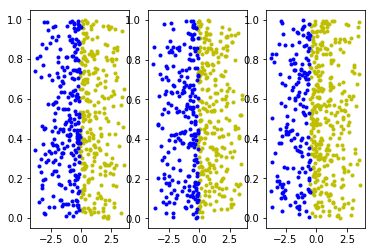

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
for key, values in firstLabels.items():
    x1.append([key[0], key[1]])
    y1.append(values)
for key, values in secLabels.items():
    x2.append([key[0], key[1]])
    y2.append(values)
for key, values in thirdLabels.items():
    x3.append([key[0], key[1]])
    y3.append(values)

clf = LinearDiscriminantAnalysis()
z1 = clf.fit_transform(x1, y1)
z2 = clf.fit_transform(x2, y2)
z3 = clf.fit_transform(x3, y3)

ax1 = plt.subplot(131)
ax1.plot([z1[i] for i in range(len(z1)) if y1[i] == 1],[np.random.rand() for i in range(len(z1)) if y1[i] == 1], '.y',
        [z1[i] for i in range(len(z1)) if y1[i] == 0] ,  [np.random.rand() for i in range(len(z1)) if y1[i] == 0], '.b')

ax2 = plt.subplot(132)
ax2.plot([z2[i] for i in range(len(z2)) if y2[i] == 1],[np.random.rand() for i in range(len(z2)) if y2[i] == 1], '.y',
        [z2[i] for i in range(len(z2)) if y2[i] == 0] ,  [np.random.rand() for i in range(len(z2)) if y2[i] == 0], '.b')

ax3 = plt.subplot(133)
ax3.plot([z3[i] for i in range(len(z3)) if y3[i] == 1],[np.random.rand() for i in range(len(z3)) if y3[i] == 1], '.y',
        [z3[i] for i in range(len(z3)) if y3[i] == 0] ,  [np.random.rand() for i in range(len(z3)) if y3[i] == 0], '.b')


plt.show()

# D: Nonlinear Data
Steps:
* Use generated data below.
* Apply PCA and LDA to this data, and visualize it(seperately).

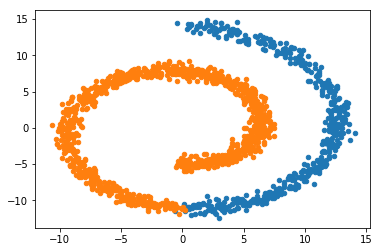

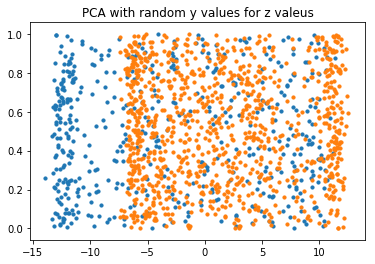

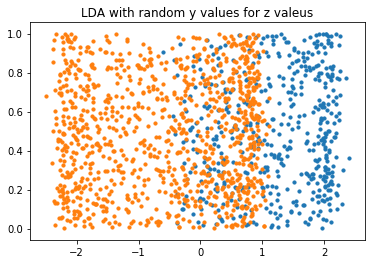

In [5]:
def genData():
    from sklearn.datasets import make_swiss_roll 
    n_samples = 1500
    noise = 0.5
    X, t = make_swiss_roll(n_samples, noise)
    # Make it thinner
    fig = plt.figure()
    Data = np.zeros([1500,2])
    Data[:,0] = X[:,0]
    Data[:,1] = X[:,2]
    Labels = np.zeros([1500,])
    Labels[t>11]=1

    plt.scatter(Data[Labels==1, 0], Data[Labels==1, 1],
       s=20,)
    plt.scatter(Data[Labels==0, 0], Data[Labels==0, 1],
       s=20,)
    return Data,Labels
Data,Labels=genData()
us = PCA(Data.T)
firstPC = us[:,0]
mean = np.mean(Data, axis=0)
dataNorm = Data - mean
z = np.dot(firstPC, dataNorm.T)
fig1  = plt.figure()
plt.title("PCA with random y values for z valeus")
plt.scatter(z[Labels==1], np.random.rand(len(z[Labels==1])), s=10)
plt.scatter(z[Labels==0],  np.random.rand(len(z[Labels==0])), s=10)

fig2  = plt.figure()
plt.title("LDA with random y values for z valeus")
z = clf.fit_transform(Data, Labels)
plt.scatter(z[Labels==1], np.random.rand(len(z[Labels==1])), s=10)
plt.scatter(z[Labels==0],  np.random.rand(len(z[Labels==0])), s=10)



## B: K-Nearest Neighbor
Steps:
* Implement k-nearest neighbor. 
* Run it with k=1,10,40. 
* Using test set, Report
    - best k,
    - prediction error for all k’s.
    - confusion matrix for all k’s.

In [34]:
 import numpy as np


def euclidian_distance(p1 ,p2):
    dist = ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
    return dist

def confusion(actual, predicted):
    cm = np.zeros((3,3))
    for a, p in zip(actual, predicted):
        cm[int(a)][int(p)] += 1
    return cm
def accuracy(actual, predicted):
    accuracy = (actual == predicted).sum() / float(len(actual))
    return accuracy

def rmse(actual, predicted):
    mse = np.mean((actual - predicted)**2)
    return np.sqrt(mse)


from operator import itemgetter
def knn(train, tst, k):
    ret = []
    for p in tst:
        distances = {}
        for p1 in train:
            distances[tuple(p1)] = euclidian_distance(p, [p1[0], p1[1]])
        neighbours = (sorted(distances.items(), key=itemgetter(1)))
        labelNos = [0, 0, 0]
        i = 0
        for key in neighbours:
            if i == k:
                break
            labelNos[int(key[0][2])] = labelNos[int(key[0][2])] + 1
            i = i+1
        ret.append([p[0], p[1], labelNos.index(max(labelNos))])
    return np.array(ret)

k1 = knn(train, test[:,[0,1]], 1)
print("FOR K = 1 PREDICTION ERROR AND CONFUSION MATRIX")
print("Confusion matrix : ")
print(confusion(test[:,2],k1[:,2]))
acc1 = accuracy(test[:,2],k1[:,2])
print("Accuracy : ", acc1)
pr1 = rmse(test[:,2],k1[:,2])
print("Prediction Error : ", pr1)
print()

k10 = knn(train, test[:,[0,1]], 10)
print("FOR K = 10 PREDICTION ERROR AND CONFUSION MATRIX")
print(confusion(test[:,2],k10[:,2]))
acc2 = accuracy(test[:,2],k10[:,2])
print("Accuracy : ", acc2)
pr2 = rmse(test[:,2],k10[:,2])
print("Prediction Error : ", pr2)
print()

k40 = knn(train, test[:,[0,1]], 40)
print("FOR K = 40 PREDICTION ERROR AND CONFUSION MATRIX")
print(confusion(test[:,2],k40[:,2]))
acc3 = accuracy(test[:,2],k40[:,2])
print("Accuracy : ", acc3)
pr3 = rmse(test[:,2],k40[:,2])
print("Prediction Error : ", pr3)
print()
res = [1, 10, 40]
print("best k value : " , res[[pr1, pr2, pr3].index((min([pr1, pr2, pr3])))])


FOR K = 1 PREDICTION ERROR AND CONFUSION MATRIX
Confusion matrix : 
[[302.  89.  19.]
 [ 82. 207.  74.]
 [ 24.  88. 315.]]
Accuracy :  0.6866666666666666
Prediction Error :  0.6487166818676188

FOR K = 10 PREDICTION ERROR AND CONFUSION MATRIX
[[326.  78.   6.]
 [ 58. 260.  45.]
 [ 10.  94. 323.]]
Accuracy :  0.7575
Prediction Error :  0.5315072906367324

FOR K = 40 PREDICTION ERROR AND CONFUSION MATRIX
[[314.  90.   6.]
 [ 42. 276.  45.]
 [ 10.  92. 325.]]
Accuracy :  0.7625
Prediction Error :  0.5267826876426369

best k value :  40
